# Prediction of a songs genre based on industrial metrics on Spotify 
Modern audio distribution services like spotify provide more than 100 million songs to users. In attempt to create unambigous plaulists for users, these services create many playlists for each genre. In our project, we will classify songs using the K-nearest neighbor algorithm into 4 subgroups of Rock, R&B, Pop and Rap. The metrics we will use to make such predictions are:
- Liveness:
- Daceability:
- Valence:
- Acousticness: 
- Speechiness: 
- Loudness:
In the exploratory seciton we shall look at the distribution of these charecteristics for each category to see if a noticable difference that can be exploited by our algorithm exists.

In [82]:
library(tidyverse)
library(dplyr)
library(stringr)


In [138]:

# Get training data
# Keeping only genres of pop, rap, rock and r&b.
spotify_tracks <- read_csv("data/spotify_songs.csv") |> 
    filter(playlist_genre != "latin" , playlist_genre != "edm")

#Selecting predictors
spotify_char <- spotify_tracks |> 
    select("playlist_genre","danceability","liveness","valence","acousticness","speechiness","loudness") |>
    mutate(top_hit=0)



## comparing artists

Rows: 32833 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): track_id, track_name, track_artist, track_album_id, track_album_na...
dbl (13): track_popularity, danceability, energy, key, loudness, mode, speec...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


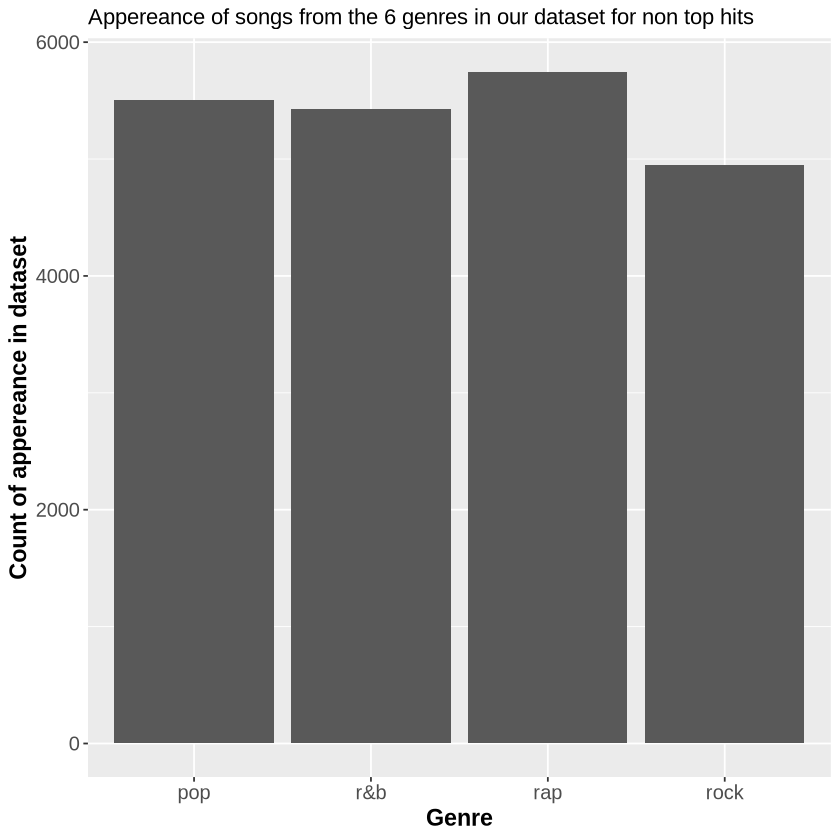

In [139]:
#Analyzing spread of the songs genres

genre_plot_non_hit <- ggplot(spotify_tracks,aes(x=playlist_genre)) + 
    geom_bar(stat="count") + 
    xlab("Genre") + 
    ylab("Count of appereance in dataset") + 
    ggtitle("Appereance of songs from the 6 genres in our dataset for non top hits") + 
    theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"))

genre_plot_non_hit

As can be seen above, distribution of the genres in our non-top hits dataset is adequate for a satisfactory analysis. Now we shall see the distribution of our predictors for each cateogry.


In [135]:

colnames(merging_spotify_non_top_hits)

distributions <- ggplot(merging_spotify_non_top_hits,aes(x=valence)) +
    geom_bar(stat="count")

distributions


[1] "playlist_genre" "danceability"   "liveness"       "valence"       
[5] "acousticness"   "speechiness"    "loudness"       "top_hit"

ERROR: [1m[33mError[39m in `grid_as_facets_list()`:[22m
[33m![39m `cols` must be a `vars()` specification or `NULL`, not a <LayerInstance/Layer/ggproto/gg> object.
